# Predict Future Stock

## # Step 1: Import Libraries and Load Stock Data

In [9]:
# 1. Import Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
# 2. Import Financial & ML Libraries
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 3. Fetch Data from Yahoo Finance
# We are using 'AAPL' (Apple Inc.) for the last 2 years
ticker_symbol = "AAPL"
print(f"Initializing connection to Yahoo Finance for {ticker_symbol}...")

try:
    df = yf.download(ticker_symbol, period="2y", interval="1d")
    print(f"Data Fetching Successful! Shape: {df.shape}")
except Exception as e:
    print(f"Error fetching data: {e}")

# Display first 5 rows to verify structure
print("\nRaw Data Preview:")
print(df.head())

Initializing connection to Yahoo Finance for AAPL...


C:\Users\Nasrullah\AppData\Local\Temp\ipykernel_10732\187426934.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker_symbol, period="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed

Data Fetching Successful! Shape: (501, 5)

Raw Data Preview:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-12-26  191.243896  192.076034  191.025954  191.798655  28919300
2023-12-27  191.342957  191.689688  189.302232  190.689143  48087700
2023-12-28  191.768936  192.838834  191.362768  192.323695  34049900
2023-12-29  190.728760  192.581260  189.936241  192.085938  42672100
2024-01-02  183.903229  186.677036  182.169601  185.399096  82488700


## Step 2: Data Cleaning and Feature Selection

In [10]:
# 1. Handle Missing Values
# Dropping any rows with missing data to maintain integrity
df_clean = df.dropna()

# 2. Feature Selection
# Features (X): Input variables (Open, High, Low, Volume)
# Target (y): Output variable (Close Price)
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = df_clean[features]
y = df_clean[target]

print("Preprocessing Complete.")
print(f"Features Selected: {features}")
print(f"Target Variable: {target}")

Preprocessing Complete.
Features Selected: ['Open', 'High', 'Low', 'Volume']
Target Variable: Close


## Step 3: Train-Test Split Strategy

In [11]:
# Splitting dataset: 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape[0]} records")
print(f"Testing Set Size : {X_test.shape[0]} records")

Training Set Size: 400 records
Testing Set Size : 101 records


## Step 4: Model Initialization and Training

In [12]:
# 1. Initialize the Linear Regression Algorithm
model = LinearRegression()

# 2. Train the Model using Training Data
print("Training the model... Please wait.")
model.fit(X_train, y_train)

print("Model Training Completed Successfully. ")
print(f"Model Intercept: {model.intercept_}")

Training the model... Please wait.
Model Training Completed Successfully. 
Model Intercept: [0.30462352]


## Step 5: Performance Evaluation and Visualization

----------------------------------------
📊 MODEL PERFORMANCE REPORT
----------------------------------------
Accuracy (R2 Score)  : 99.85%
Mean Absolute Error  : $0.99
----------------------------------------


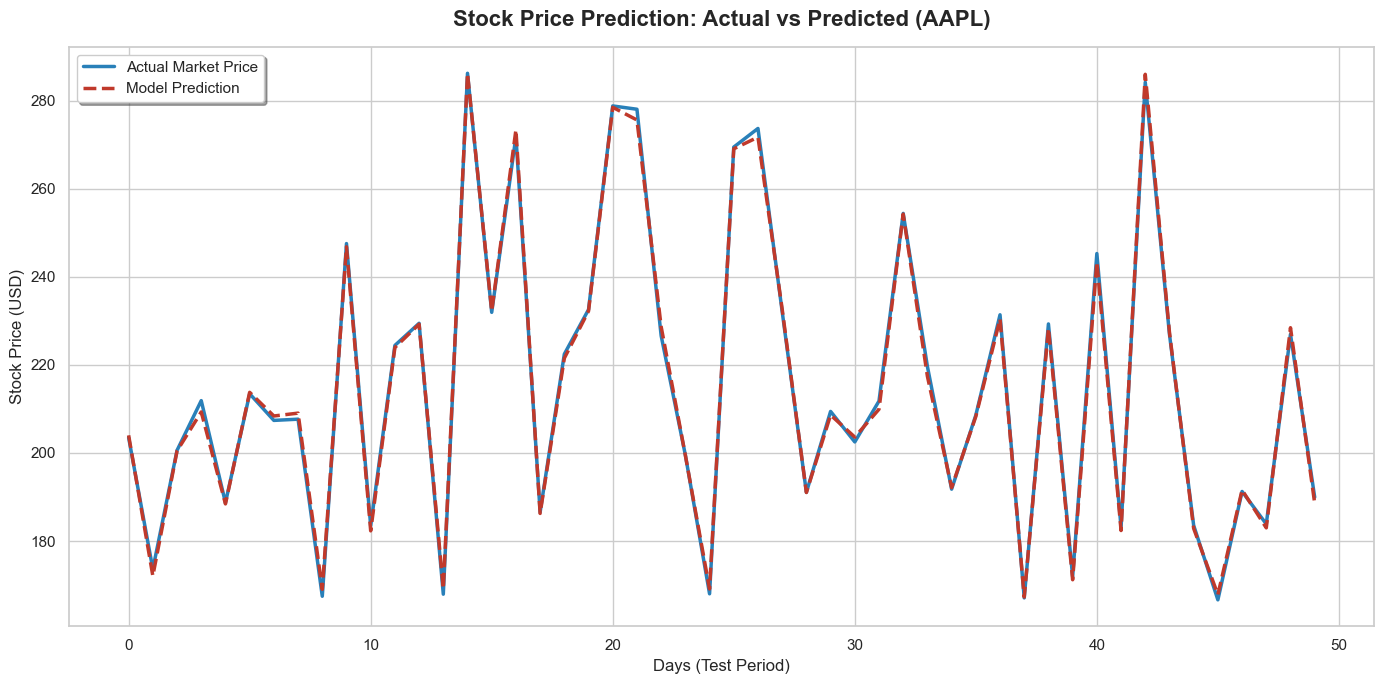

In [13]:
# 1. Generate Predictions on Test Data
y_pred = model.predict(X_test)

# 2. Performance Metrics
score_r2 = r2_score(y_test, y_pred)
mae_val = mean_absolute_error(y_test, y_pred)

print("-" * 40)
print("📊 MODEL PERFORMANCE REPORT")
print("-" * 40)
print(f"Accuracy (R2 Score)  : {score_r2*100:.2f}%")
print(f"Mean Absolute Error  : ${mae_val:.2f}")
print("-" * 40)

# 3. Visualization (Actual vs Predicted Prices)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# We plot only the first 50 days of the test set for clarity
subset_days = 50

plt.plot(y_test.values[:subset_days], label='Actual Market Price', color='#2980b9', linewidth=2.5)
plt.plot(y_pred[:subset_days], label='Model Prediction', color='#c0392b', linestyle='--', linewidth=2.5)

plt.title(f"Stock Price Prediction: Actual vs Predicted ({ticker_symbol})", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Days (Test Period)", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.legend(frameon=True, fancybox=True, shadow=True, loc='upper left')

plt.tight_layout()
plt.show()

## Advanced 3-Panel Financial Dashboard

Generating Advanced Dashboard... 


C:\Users\Nasrullah\AppData\Local\Temp\ipykernel_10732\611417817.py:69: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Nasrullah\AppData\Local\Temp\ipykernel_10732\611417817.py:69: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Nasrullah\AppData\Local\Temp\ipykernel_10732\611417817.py:69: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Nasrullah\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Nasrullah\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users

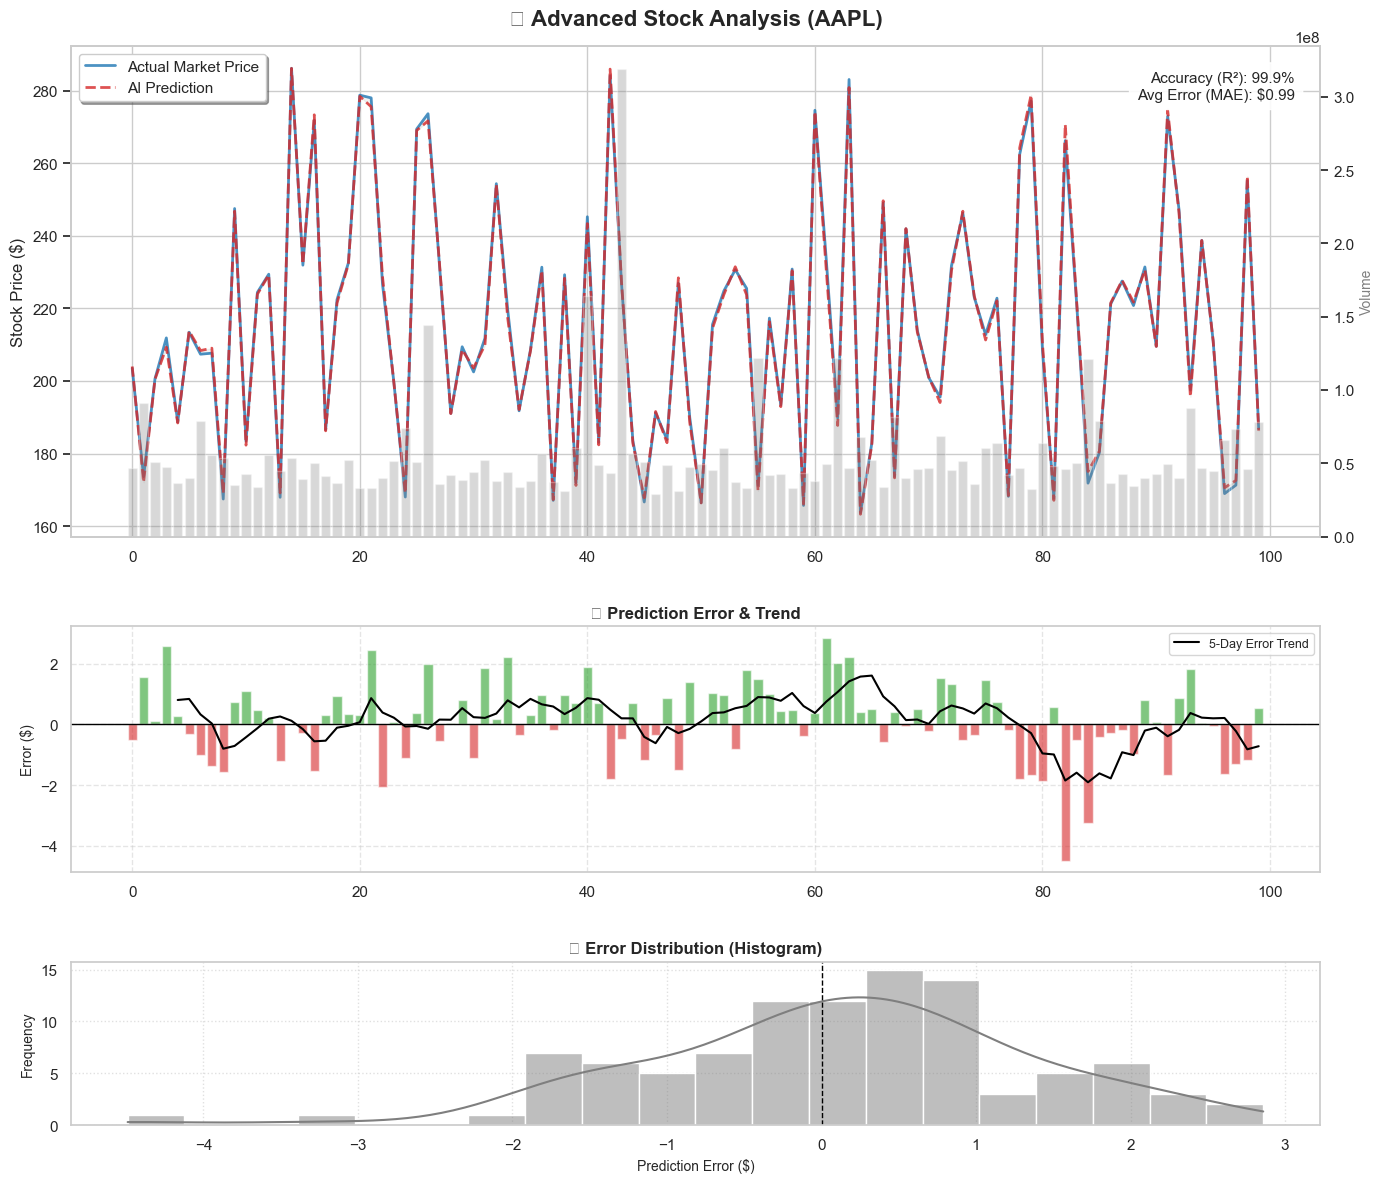

In [14]:
# --- BOX 2: ADVANCED 3-PANEL DASHBOARD ---

print("Generating Advanced Dashboard... ")

# 1. Setup and Calculations
residuals = y_test - y_pred
subset = 100 # Pehlay 100 din ka view for clarity
sns.set_theme(style="whitegrid") # Set plot theme

# Ensure arrays are 1D for plotting
actual_prices = y_test.values[:subset].flatten()
predicted_prices = y_pred[:subset].flatten()
errors = residuals[:subset].values.flatten()
volumes = X_test['Volume'].values[:subset].flatten() # Get volume data
days = np.arange(subset)

# Create a 3-row grid for 3 different plots
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1.5, 1])

# --- PANEL 1: PRICE & VOLUME COMPARISON (Main Chart) ---
ax1 = plt.subplot(gs[0])
ax1.plot(days, actual_prices, label='Actual Market Price', color='#1f77b4', linewidth=2, alpha=0.8) # Professional Blue
ax1.plot(days, predicted_prices, label='AI Prediction', color='#d62728', linestyle='--', linewidth=2, alpha=0.8) # Professional Red

# Highlight the area between actual and predicted
ax1.fill_between(days, actual_prices, predicted_prices, color='gray', alpha=0.1)

# Add Volume on a secondary y-axis (A common financial chart feature)
ax1_vol = ax1.twinx()
ax1_vol.bar(days, volumes, color='gray', alpha=0.3, width=0.8, label='Trading Volume')
ax1_vol.set_ylabel('Volume', fontsize=10, color='gray')
ax1_vol.grid(False) # Hide volume grid for clarity

ax1.set_title(f"📈 Advanced Stock Analysis ({ticker_symbol})", fontsize=16, fontweight='bold', pad=15)
ax1.set_ylabel("Stock Price ($)", fontsize=12)
ax1.legend(loc='upper left', shadow=True, fancybox=True)

# Stats Box (Top Right)
stats_text = f"Accuracy (R²): {score_r2*100:.1f}%\nAvg Error (MAE): ${mae_val:.2f}"
ax1.text(0.98, 0.95, stats_text, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9))

# --- PANEL 2: PREDICTION ERROR TREND (Middle Chart) ---
ax2 = plt.subplot(gs[1], sharex=ax1) # Share x-axis with the top plot
colors = ['#d62728' if val < 0 else '#2ca02c' for val in errors] # Red for underprediction, Green for overprediction
ax2.bar(days, errors, color=colors, alpha=0.6, width=0.8)

# Add a 5-day Moving Average of the error to show the trend
error_ma = pd.Series(errors).rolling(window=5).mean()
ax2.plot(days, error_ma, color='black', linewidth=1.5, label='5-Day Error Trend', linestyle='-')

ax2.axhline(0, color='black', linewidth=1, linestyle='-')
ax2.set_title("📉 Prediction Error & Trend", fontsize=12, fontweight='bold')
ax2.set_ylabel("Error ($)", fontsize=10)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, linestyle='--', alpha=0.5)

# --- PANEL 3: ERROR DISTRIBUTION (Bottom Chart) ---
ax3 = plt.subplot(gs[2])
sns.histplot(errors, kde=True, ax=ax3, color='#7f7f7f', bins=20, alpha=0.5)
ax3.axvline(0, color='black', linewidth=1, linestyle='--') # Zero line
ax3.set_title("📊 Error Distribution (Histogram)", fontsize=12, fontweight='bold')
ax3.set_xlabel("Prediction Error ($)", fontsize=10)
ax3.set_ylabel("Frequency", fontsize=10)
ax3.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3) # Add some space between plots
plt.show()